In [13]:
#loading libarary
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
get_ipython().run_line_magic('matplotlib', 'inline')

In [14]:
import string
df = pd.read_excel("wsd_1.xlsx", header = None)
df.rename(columns={0:'sentence', 1:'target word',2:'label'}, inplace=True)
print(df.head(8))
my_labels = ['haraa’mmima', 'moo’akkam haga’l annannooma','ichcha','qaamafeeta','sono’o','siixo’o','sire’e','qocca baxo','mine hoora','hamaama','birra']

                                     sentence target word        label
0                                 anga edukko        anga  haraa’mmima
1                                  anga edda?        anga  haraa’mmima
2                              anga gaassukko        anga  haraa’mmima
3                                anga haraara        anga  haraa’mmima
4  lonsoni anga hoffiixxa manna hara’mmittamo        anga  haraa’mmima
5                                   anga ejja        anga  haraa’mmima
6                            anga baxo edukko        anga  haraa’mmima
7                                anga issukko        anga  haraa’mmima


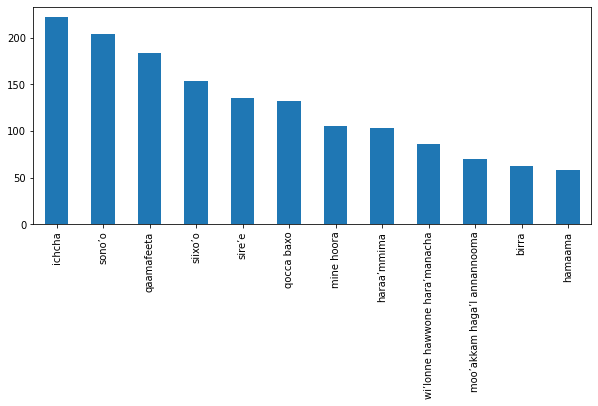

In [8]:
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

In [15]:
X = df.sentence
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

In [16]:
print ('Total   sentence count:', len(df))
print ('haraa’mmima sentence count:', len(df[df.label == "haraa’mmima"]), '\n')
print ('moo’akkam haga’l annannooma sentence count:', len(df[df.label == "moo’akkam haga’l annannooma"]),'\n')
print ('ichcha sentence count:', len(df[df.label == "ichcha"]), '\n')
print ('qaamafeeta sentence count:', len(df[df.label == "qaamafeeta"]), '\n')
print ('sono’o sentence count:', len(df[df.label == "sono’o"]), '\n')
print ('siixo’o sentence count:', len(df[df.label == "siixo’o"]), '\n')
print ('sire’e sentence count:', len(df[df.label== "sire’e"]), '\n')
print ('qocca baxo sentence count:', len(df[df.label == "qocca baxo"]), '\n')
print ('mine hoora sentence count:', len(df[df.label == "mine hoora"]), '\n')

print ('wi’lonne hawwone hara’manacha sentence count:', len(df[df.label == "wi’lonne hawwone hara’manacha"]), '\n')
print ('hamaama sentence count:', len(df[df.label == "hamaama"]), '\n')

print ('birra sentence count:', len(df[df.label == "birra"]), '\n')
print ('Total sentence count in training sample:', len(X_train))
print ('Total sentence count in test sample:    ', len(X_test))
print ('haraa’mmima  sentence count in X_train:', X_train[y_train == "haraa’mmima"].count())
print ('moo’akkam haga’l annannooma sentence count in X_train:', X_train[y_train == "moo’akkam haga’l annannooma"].count())
print ('ichcha  sentence count in X_train:', X_train[y_train == "ichcha"].count())
print ('qaamafeeta  sentence count in X_train:', X_train[y_train == "qaamafeeta"].count())
print ('sono’o  sentence count in X_train:', X_train[y_train == "sono’o"].count())
print ('siixo’o  sentence count in X_train:', X_train[y_train == "siixo’o"].count())
print ('sire’e  sentence count in X_train:', X_train[y_train == "sire’e"].count())
print ('qocca baxo  sentence count in X_train:', X_train[y_train == "qocca baxo"].count())
print ('mine hoora  sentence count in X_train:', X_train[y_train == "mine hoora"].count())


print ('wi’lonne hawwone hara’manacha  sentence count in X_train:', X_train[y_train == "wi’lonne hawwone hara’manacha"].count())
print ('hamaama  sentence count in X_train:', X_train[y_train == "hamaama"].count())
print ('birra  sentence count in X_train:', X_train[y_train == "birra"].count())

print ('haraa’mmima  sentence count in X_test:', X_test[y_test == "haraa’mmima"].count())
print ('moo’akkam haga’l annannooma post count in X_test:', X_test[y_test == "moo’akkam haga’l annannooma"].count())
print ('ichcha  sentence count in X_test:', X_test[y_test == "ichcha"].count())
print ('qaamafeeta  sentence count in X_test:', X_test[y_test == "qaamafeeta"].count())
print ('sono’o  sentence count in X_test:', X_test[y_test == "sono’o"].count())
print ('siixo’o  sentence count in X_test:', X_test[y_test == "siixo’o"].count())
print ('sire’e  sentence count in X_test:', X_test[y_test == "sire’e"].count())
print ('qocca baxo  sentence count in X_test:', X_test[y_test == "qocca baxo"].count())
print ('mine hoora  sentence count in X_test:', X_test[y_test == "mine hoora"].count())


print ('wi’lonne hawwone hara’manacha  sentence count in X_test:', X_test[y_test == "wi’lonne hawwone hara’manacha"].count())
print ('hamaama  sentence count in X_test:', X_test[y_test == "hamaama"].count())
print ('birra  sentence count in X_test:', X_test[y_test == "birra"].count())

Total   sentence count: 1516
haraa’mmima sentence count: 103 

moo’akkam haga’l annannooma sentence count: 70 

ichcha sentence count: 222 

qaamafeeta sentence count: 184 

sono’o sentence count: 204 

siixo’o sentence count: 154 

sire’e sentence count: 135 

qocca baxo sentence count: 132 

mine hoora sentence count: 105 

wi’lonne hawwone hara’manacha sentence count: 86 

hamaama sentence count: 58 

birra sentence count: 63 

Total sentence count in training sample: 1212
Total sentence count in test sample:     304
haraa’mmima  sentence count in X_train: 81
moo’akkam haga’l annannooma sentence count in X_train: 62
ichcha  sentence count in X_train: 179
qaamafeeta  sentence count in X_train: 147
sono’o  sentence count in X_train: 149
siixo’o  sentence count in X_train: 123
sire’e  sentence count in X_train: 110
qocca baxo  sentence count in X_train: 114
mine hoora  sentence count in X_train: 84
wi’lonne hawwone hara’manacha  sentence count in X_train: 68
hamaama  sentence count in 

In [17]:
from sklearn.feature_extraction import text
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.8)

my_stop_words = text.ENGLISH_STOP_WORDS.union(["hadiyyisa"])

train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['12', '19', '620', 'aa', 'aad', 'aagamukko', 'aageena', 'aagimminne', 'aagise', 'aagisookko']


In [ ]:
print(df.columns)

accuracy 0.7105263157894737
                               precision    recall  f1-score   support

                        birra       1.00      0.07      0.12        15
                      hamaama       0.00      0.00      0.00        11
                  haraa’mmima       1.00      0.32      0.48        22
                       ichcha       0.62      0.98      0.76        43
                   mine hoora       0.68      0.90      0.78        21
  moo’akkam haga’l annannooma       1.00      0.38      0.55         8
                   qaamafeeta       0.70      0.95      0.80        37
                   qocca baxo       0.81      0.94      0.87        18
                      siixo’o       0.67      0.90      0.77        31
                       sire’e       0.91      0.40      0.56        25
                       sono’o       0.74      0.96      0.83        55
wi’lonne hawwone hara’manacha       1.00      0.06      0.11        18

                     accuracy                  

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cross Validation scores:ShuffleSplit[0.71710526 0.6875     0.69078947 0.70394737 0.74671053 0.69736842
 0.71381579 0.73684211 0.66776316 0.69736842]
Average Cross Validation score of ShuffleSplit:0.705921052631579


<AxesSubplot:xlabel='actual', ylabel='predicted'>

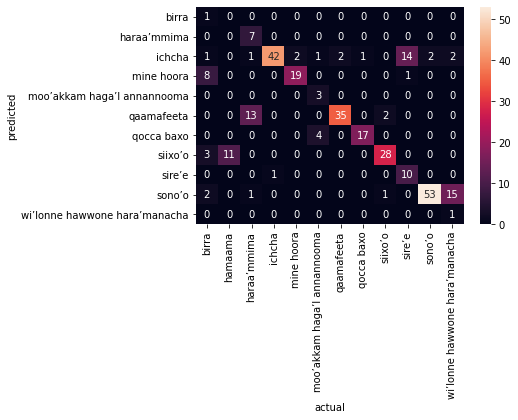

In [18]:
# Naive Bayes Classifier
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
wsd_bn = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha=1)),
              ])
wsd_bn.fit(X_train, y_train)
filename = 'wsd_bn.sav'
pickle.dump(wsd_bn, open(filename, 'wb'))
vectorizer = CountVectorizer()

vectors = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(y_test)
y_pred = wsd_bn.predict(X_test)
nbaccuracy=accuracy_score(y_pred, y_test)


print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
#Monte Carlo Cross-Validation(Shuffle Split) is a very flexible strategy of cross-validation. In this technique, the datasets get randomly partitioned into training and validation sets.
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.2,train_size=0.8,n_splits=10)
scores=cross_val_score(wsd_bn,X,y,cv=shuffle_split)
print("cross Validation scores:ShuffleSplit{}".format(scores))
print("Average Cross Validation score of ShuffleSplit:{}".format(scores.mean()))
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix=pd.crosstab(y_pred,y_test, rownames=['predicted'],colnames=['actual'])
sns.heatmap(confusion_matrix,annot=True)

In [20]:
# Linear Support Vector Machine
from sklearn.linear_model import SGDClassifier

wsd_svm = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=10, max_iter=4, tol=None)),
               ])
wsd_svm.fit(X_train, y_train)
filename = 'wsd_svm.sav'
pickle.dump(wsd_svm, open(filename, 'wb'))

                               precision    recall  f1-score   support

                        birra       0.80      0.27      0.40        15
                      hamaama       1.00      0.36      0.53        11
                  haraa’mmima       1.00      0.45      0.62        22
                       ichcha       0.71      0.93      0.81        43
                   mine hoora       0.62      0.95      0.75        21
  moo’akkam haga’l annannooma       1.00      0.38      0.55         8
                   qaamafeeta       0.74      0.95      0.83        37
                   qocca baxo       0.78      1.00      0.88        18
                      siixo’o       0.82      1.00      0.90        31
                       sire’e       0.85      0.44      0.58        25
                       sono’o       0.85      0.96      0.91        55
wi’lonne hawwone hara’manacha       0.91      0.56      0.69        18

                     accuracy                           0.79       304
    

<AxesSubplot:xlabel='actual', ylabel='predicted'>

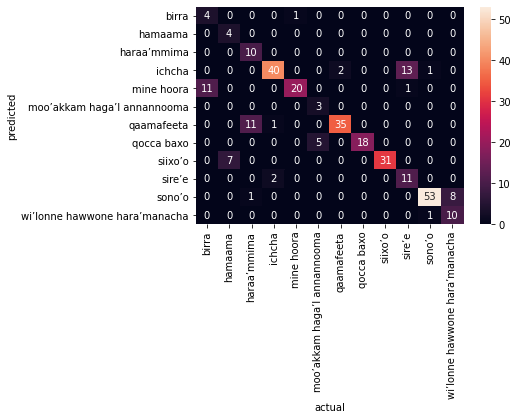

In [21]:
%%time
from sklearn.metrics import classification_report
y_pred = wsd_svm.predict(X_test)
svmaccuracy=accuracy_score(y_pred, y_test)


print(classification_report(y_test, y_pred))
#Monte Carlo Cross-Validation(Shuffle Split) is a very flexible strategy of cross-validation. In this technique, the datasets get randomly partitioned into training and validation sets.
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.2,train_size=0.8,n_splits=10)
scores=cross_val_score(wsd_svm,X,y,cv=shuffle_split)
print("cross Validation scores:ShuffleSplit{}".format(scores))
print("Average Cross Validation score of ShuffleSplit:{}".format(scores.mean()))
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix=pd.crosstab(y_pred,y_test, rownames=['predicted'],colnames=['actual'])
sns.heatmap(confusion_matrix,annot=True)

In [22]:
#Neural Network
from sklearn.neural_network import MLPClassifier
wsd_nn=Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MLPClassifier(alpha=1e-05, max_iter=480,hidden_layer_sizes=(6,), random_state=1,
              solver='lbfgs')),
              ])

wsd_nn.fit(X_train, y_train)
filename = 'wsd_nn.sav'
pickle.dump(wsd_nn, open(filename, 'wb'))


                               precision    recall  f1-score   support

                        birra       0.64      0.60      0.62        15
                      hamaama       0.67      0.36      0.47        11
                  haraa’mmima       0.88      0.32      0.47        22
                       ichcha       0.74      0.67      0.71        43
                   mine hoora       0.68      0.81      0.74        21
  moo’akkam haga’l annannooma       0.80      0.50      0.62         8
                   qaamafeeta       0.68      0.97      0.80        37
                   qocca baxo       0.83      0.83      0.83        18
                      siixo’o       0.81      0.97      0.88        31
                       sire’e       0.58      0.60      0.59        25
                       sono’o       0.85      0.85      0.85        55
wi’lonne hawwone hara’manacha       0.61      0.61      0.61        18

                     accuracy                           0.74       304
    

<AxesSubplot:xlabel='actual', ylabel='predicted'>

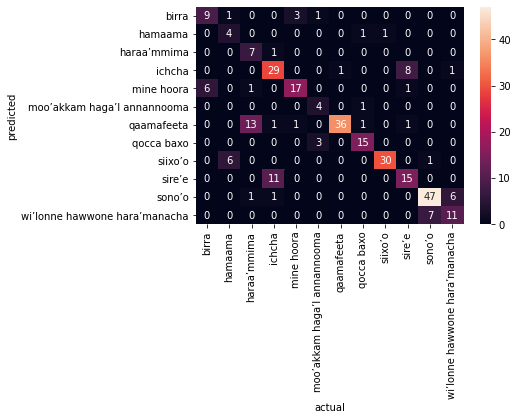

In [23]:
%%time
from sklearn.metrics import classification_report

y_pred = wsd_nn.predict(X_test)
nnaccuracy=accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
#Monte Carlo Cross-Validation(Shuffle Split) is a very flexible strategy of cross-validation. In this technique, the datasets get randomly partitioned into training and validation sets.
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.2,train_size=0.8,n_splits=10)
scores=cross_val_score(wsd_nn,X,y,cv=shuffle_split)
print("cross Validation scores:ShuffleSplit{}".format(scores))
print("Average Cross Validation score of ShuffleSplit:{}".format(scores.mean()))
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix=pd.crosstab(y_pred,y_test, rownames=['predicted'],colnames=['actual'])
sns.heatmap(confusion_matrix,annot=True)

In [26]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []
#Defining  Naive Bayes classifiers
NB = MultinomialNB()
estimators.append(('nbs1', NB))
#Defining Support Vector Classifiers
SVM = SGDClassifier()
estimators.append(('svm1', SVM))
# Neural Network  Classifier
NN=MLPClassifier()
estimators.append(('nn1', NN))
# Defining the hybrid model
wsd_hybrid = VotingClassifier(estimators)
wsd_hybrid = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', VotingClassifier(estimators=[ ('nbs1', NB),('svm1', SVM),('nn1', NN)],weights=[1,1,1])),
              ])
wsd_hybrid.fit(X_train, y_train)
filename = 'wsd_hybrid.sav'


accuracy 0.819078947368421
                               precision    recall  f1-score   support

                        birra       0.80      0.53      0.64        15
                      hamaama       0.80      0.36      0.50        11
                  haraa’mmima       0.87      0.59      0.70        22
                       ichcha       0.72      0.91      0.80        43
                   mine hoora       0.73      0.90      0.81        21
  moo’akkam haga’l annannooma       1.00      0.75      0.86         8
                   qaamafeeta       0.76      0.95      0.84        37
                   qocca baxo       0.89      0.94      0.92        18
                      siixo’o       0.78      0.90      0.84        31
                       sire’e       0.81      0.52      0.63        25
                       sono’o       0.94      0.93      0.94        55
wi’lonne hawwone hara’manacha       0.94      0.89      0.91        18

                     accuracy                   

<AxesSubplot:xlabel='actual', ylabel='predicted'>

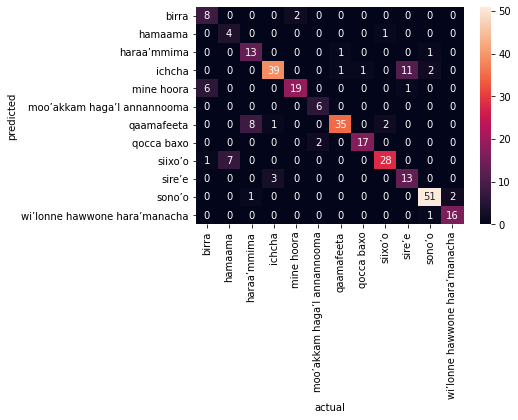

In [27]:
%%time
pickle.dump(wsd_hybrid, open(filename, 'wb'))
y_pred = wsd_hybrid.predict(X_test)
#Confisuin matrix
hybrid=accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
#Monte Carlo Cross-Validation(Shuffle Split) is a very flexible strategy of cross-validation. In this technique, the datasets get randomly partitioned into training and validation sets.
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.2,train_size=0.8,n_splits=10)
scores=cross_val_score(wsd_hybrid,X,y,cv=shuffle_split)
print("cross Validation scores:ShuffleSplit{}".format(scores))
print("Average Cross Validation score of ShuffleSplit:{}".format(scores.mean()))
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix=pd.crosstab(y_pred,y_test, rownames=['predicted'],colnames=['actual'])
sns.heatmap(confusion_matrix,annot=True)

Naive Bayes accuracy_score: 0.7105263157894737
Neural Network accuracy_score: 0.7368421052631579
Support Vector Machine accuracy_score: 0.7861842105263158
Hybrid Model accuracy_score: 0.819078947368421


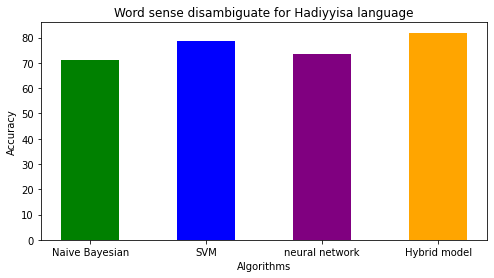

In [28]:
#test the four models with the test data and print their accuracy scores
print('Naive Bayes accuracy_score: {}'.format(wsd_bn.score(X_test, y_test)))
print('Neural Network accuracy_score: {}'.format(wsd_nn.score(X_test, y_test)))
print('Support Vector Machine accuracy_score: {}'.format(wsd_svm.score(X_test, y_test)))
print('Hybrid Model accuracy_score: {}'.format(wsd_hybrid.score(X_test, y_test)))
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4] 
height = [nbaccuracy*100,svmaccuracy*100,nnaccuracy*100,hybrid*100] 
plt.figure(figsize=(8,4)) 
# labels for bars 
tick_label = ['Naive Bayesian','SVM','neural network','Hybrid model'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.5, color = ['green','blue','purple','orange']) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy') 
# plot title 
plt.title('Word sense disambiguate for Hadiyyisa language') 
 
# function to show the plot 
plt.show() 